In [5]:
import pandas as pd
import os
import openpyxl

In [8]:
# Relative path to the Excel file (PRE PANDEMIC)
file_path = "2019-29/education.xlsx"
# Now the post pandemic path
file_path2 = "2023-33/education.xlsx"

# Load the workbook
# Prepandemic workbook
workbook = openpyxl.load_workbook(file_path)
# Postpandemic workbook
workbook2 = openpyxl.load_workbook(file_path2)

# Collection of the spreadsheet tabs we will be working with (PRE PANDEMIC)
table1 = workbook["Table 5.2"]
table2 = workbook["Table 5.3"]
table3 = workbook["Table 5.4"]

# Collection of spreadsheet tabs we will also be working with (POST PANDEMIC)
table1p = workbook["Table 5.2"]
table2p = workbook["Table 5.3"]
table3p = workbook["Table 5.4"]
# Note: post-pandemic spreadsheet has an additional data table Table 5.1, but since it is absent in the pre-pandemic tables, I didn't include it

# Function that processes and outputs all of our data
def processTable(sheet):
    # Loop through rows and columns to extract data neatly
    for row in sheet.iter_rows(min_row=1, max_row=sheet.max_row, min_col=1, max_col=sheet.max_column):
        row_values = [cell.value for cell in row]
        #print(row_values) # test


In [9]:
# -- PRE PANDEMIC DATA --

# This data table is Table 5.2 Employment, wages, and projected change in employment by typical entry-level education (Employment in thousands)
# List indices are: Typical Entry level education, employment 2019, employment distribution % 2019, employment change % 2019-29, median annual wage
processTable(table1)
print("\n")

['Table 5.2 Employment, wages, and projected change in employment by typical entry-level education \n(Employment in thousands)', None, None, None, None]
['Typical entry-level education', 'Employment, 2019', 'Employment distribution, percent, 2019', 'Employment change, percent, 2019-29', 'Median annual wage, 2020(1)']
['Total, all occupations', 162795.6, 100, 3.7, 41950]
['Doctoral or professional degree', 4412.8, 2.7, 5.9, 110200]
["Master's degree", 2633.9, 1.6, 15, 78210]
["Bachelor's degree", 36864.2, 22.6, 6.4, 77920]
["Associate's degree", 3601.6, 2.2, 6.2, 56590]
['Postsecondary nondegree award', 10093.2, 6.2, 5.6, 41520]
['Some college, no degree', 4085, 2.5, -0.1, 37770]
['High school diploma or equivalent', 62410, 38.3, 1.5, 39070]
['No formal educational credential', 38694.8, 23.8, 3.3, 27510]
['Footnotes:', None, None, None, None]
['(1) Data are from the Occupational Employment Statistics program, U.S. Bureau of Labor Statistics.  Wage data cover non-farm wage and salary wor

Labels: ['Doctoral or professional degree', "Master's degree", "Bachelor's degree", "Associate's degree", 'Postsecondary nondegree award', 'Some college, no degree', 'High school diploma or equivalent', 'No formal educational credential']
Employment 2019: [4412.8, 2633.9, 36864.2, 3601.6, 10093.2, 4085, 62410, 38694.8]


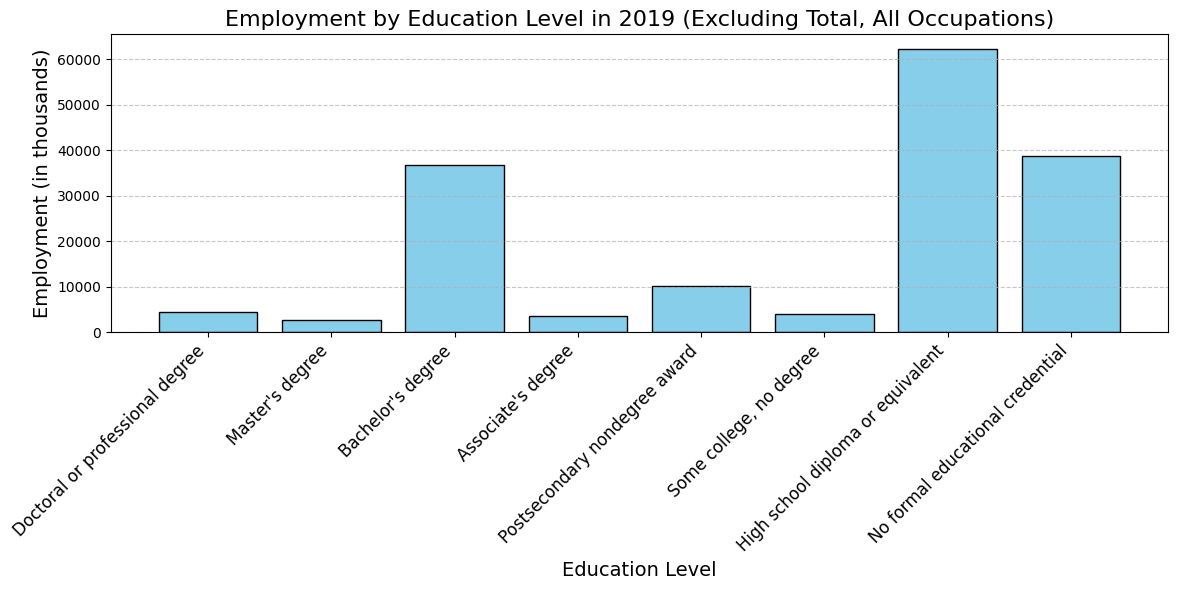

In [10]:
import matplotlib.pyplot as plt

# Function to process and extract relevant rows
def extract_employment_data(sheet):
    data = []
    for row in sheet.iter_rows(min_row=1, max_row=sheet.max_row, min_col=1, max_col=sheet.max_column):
        row_values = [cell.value for cell in row]
        # Skip metadata rows
        if (
            not row_values[0] or  # Skip rows with no label
            row_values[0].startswith("Table") or  # Skip title row
            row_values[0] == "Typical entry-level education" or  # Skip header row
            row_values[0] in ("Footnotes:", "(1)") or  # Skip footnote rows
            row_values[0].startswith("Note:") or  # Skip notes
            row_values[0].startswith("Source:")  # Skip source
        ):
            continue
        # Ensure all data rows have meaningful values
        if row_values[1] is not None:  # Check if Employment, 2019 is valid
            data.append(row_values)
    return data

# Extract relevant data
processed_data = extract_employment_data(table1)

# Remove "Total, all occupations"
filtered_data = [row for row in processed_data if row[0] != "Total, all occupations"]

# Extract labels and employment values
labels = [row[0] for row in filtered_data]  # Column 0 (education levels)
employment_2019 = [row[1] for row in filtered_data]  # Column 1 (employment)

# Print extracted data
print("Labels:", labels)
print("Employment 2019:", employment_2019)

# Plot the graph
plt.figure(figsize=(12, 6))
plt.bar(labels, employment_2019, color='skyblue', edgecolor='black')
plt.title('Employment by Education Level in 2019 (Excluding Total, All Occupations)', fontsize=16)
plt.xlabel('Education Level', fontsize=14)
plt.ylabel('Employment (in thousands)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Labels: ['Doctoral or professional degree', "Master's degree", "Bachelor's degree", "Associate's degree", 'Postsecondary nondegree award', 'Some college, no degree', 'High school diploma or equivalent', 'No formal educational credential']
Employment Distribution Percent, 2019: [2.7, 1.6, 22.6, 2.2, 6.2, 2.5, 38.3, 23.8]


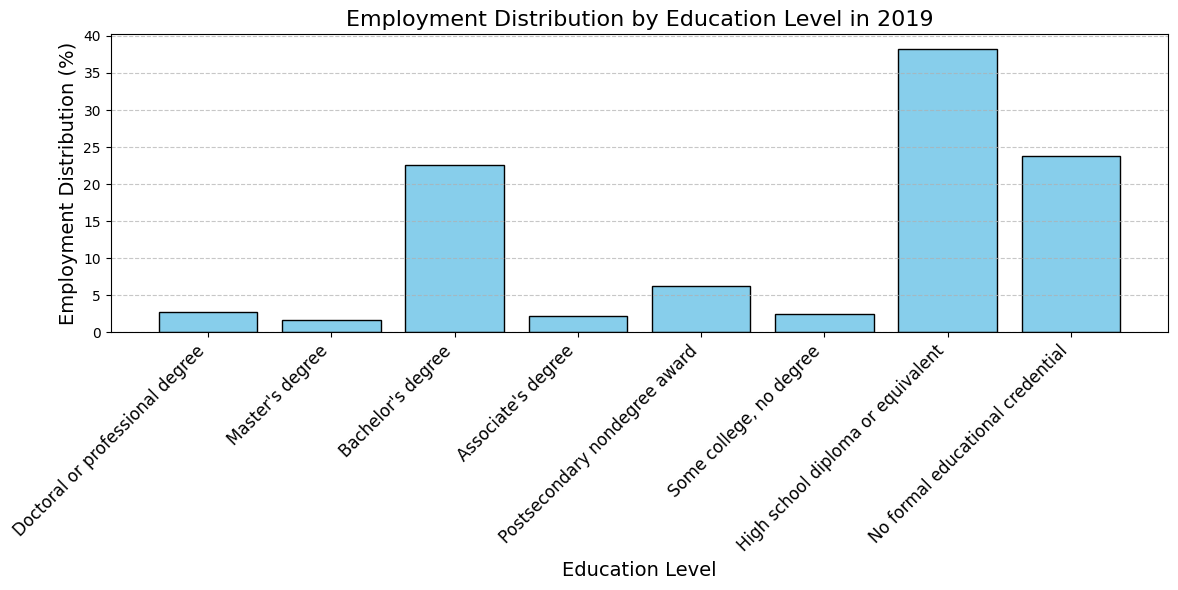

In [11]:

# Function to process and extract relevant rows
def extract_employment_distribution(sheet):
    data = []
    for row in sheet.iter_rows(min_row=1, max_row=sheet.max_row, min_col=1, max_col=sheet.max_column):
        row_values = [cell.value for cell in row]
        # Skip metadata rows
        if (
            not row_values[0] or  # Skip rows with no label
            row_values[0].startswith("Table") or  # Skip title row
            row_values[0] == "Typical entry-level education" or  # Skip header row
            row_values[0] in ("Footnotes:", "(1)") or  # Skip footnote rows
            row_values[0].startswith("Note:") or  # Skip notes
            row_values[0].startswith("Source:")  # Skip source
        ):
            continue
        # Ensure all data rows have meaningful values
        if row_values[2] is not None:  # Check if Employment distribution percent is valid
            data.append(row_values)
    return data

# Extract relevant data (employment distribution percent)
processed_data_distribution = extract_employment_distribution(table1)

# Remove "Total, all occupations"
filtered_data_distribution = [row for row in processed_data_distribution if row[0] != "Total, all occupations"]

# Extract labels and employment distribution percentage values
labels_distribution = [row[0] for row in filtered_data_distribution]  # Column 0 (education levels)
employment_distribution_2019 = [row[2] for row in filtered_data_distribution]  # Column 2 (employment distribution %)

# Print extracted data
print("Labels:", labels_distribution)
print("Employment Distribution Percent, 2019:", employment_distribution_2019)

# Plot the graph
plt.figure(figsize=(12, 6))
plt.bar(labels_distribution, employment_distribution_2019, color='skyblue', edgecolor='black')

# Adding title and labels
plt.title('Employment Distribution by Education Level in 2019', fontsize=16)
plt.xlabel('Education Level', fontsize=14)
plt.ylabel('Employment Distribution (%)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()


Labels: ['Doctoral or professional degree', "Master's degree", "Bachelor's degree", "Associate's degree", 'Postsecondary nondegree award', 'Some college, no degree', 'High school diploma or equivalent', 'No formal educational credential']
Employment Change Percent, 2019-29: [5.9, 15, 6.4, 6.2, 5.6, -0.1, 1.5, 3.3]


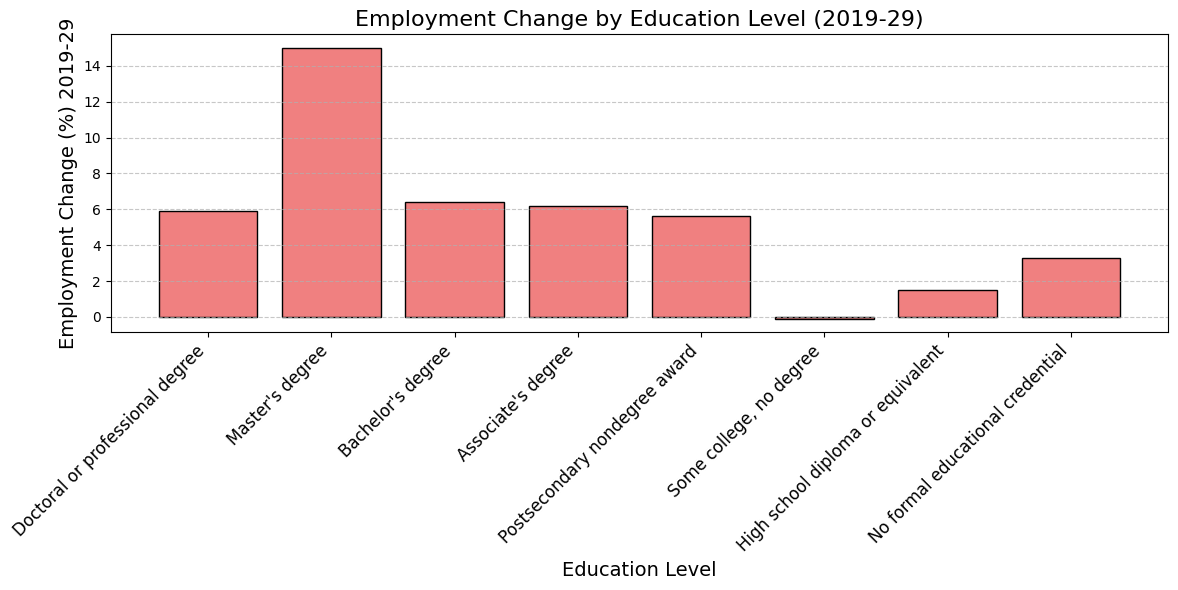

In [12]:
import matplotlib.pyplot as plt

# Function to process and extract relevant rows
def extract_employment_change(sheet):
    data = []
    for row in sheet.iter_rows(min_row=1, max_row=sheet.max_row, min_col=1, max_col=sheet.max_column):
        row_values = [cell.value for cell in row]
        # Skip metadata rows
        if (
            not row_values[0] or  # Skip rows with no label
            row_values[0].startswith("Table") or  # Skip title row
            row_values[0] == "Typical entry-level education" or  # Skip header row
            row_values[0] in ("Footnotes:", "(1)") or  # Skip footnote rows
            row_values[0].startswith("Note:") or  # Skip notes
            row_values[0].startswith("Source:")  # Skip source
        ):
            continue
        # Ensure all data rows have meaningful values
        if row_values[3] is not None:  # Check if Employment change percent is valid
            data.append(row_values)
    return data

# Extract relevant data (employment change percent)
processed_data_change = extract_employment_change(table1)

# Remove "Total, all occupations"
filtered_data_change = [row for row in processed_data_change if row[0] != "Total, all occupations"]

# Extract labels and employment change percentage values
labels_change = [row[0] for row in filtered_data_change]  # Column 0 (education levels)
employment_change_percent_2019_29 = [row[3] for row in filtered_data_change]  # Column 3 (employment change percent 2019-29)

# Print extracted data
print("Labels:", labels_change)
print("Employment Change Percent, 2019-29:", employment_change_percent_2019_29)

# Plot the graph
plt.figure(figsize=(12, 6))
plt.bar(labels_change, employment_change_percent_2019_29, color='lightcoral', edgecolor='black')

# Adding title and labels
plt.title('Employment Change by Education Level (2019-29)', fontsize=16)
plt.xlabel('Education Level', fontsize=14)
plt.ylabel('Employment Change (%) 2019-29', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()


Labels: ['Doctoral or professional degree', "Master's degree", "Bachelor's degree", "Associate's degree", 'Postsecondary nondegree award', 'Some college, no degree', 'High school diploma or equivalent', 'No formal educational credential']
Median Annual Wage: [110200, 78210, 77920, 56590, 41520, 37770, 39070, 27510]


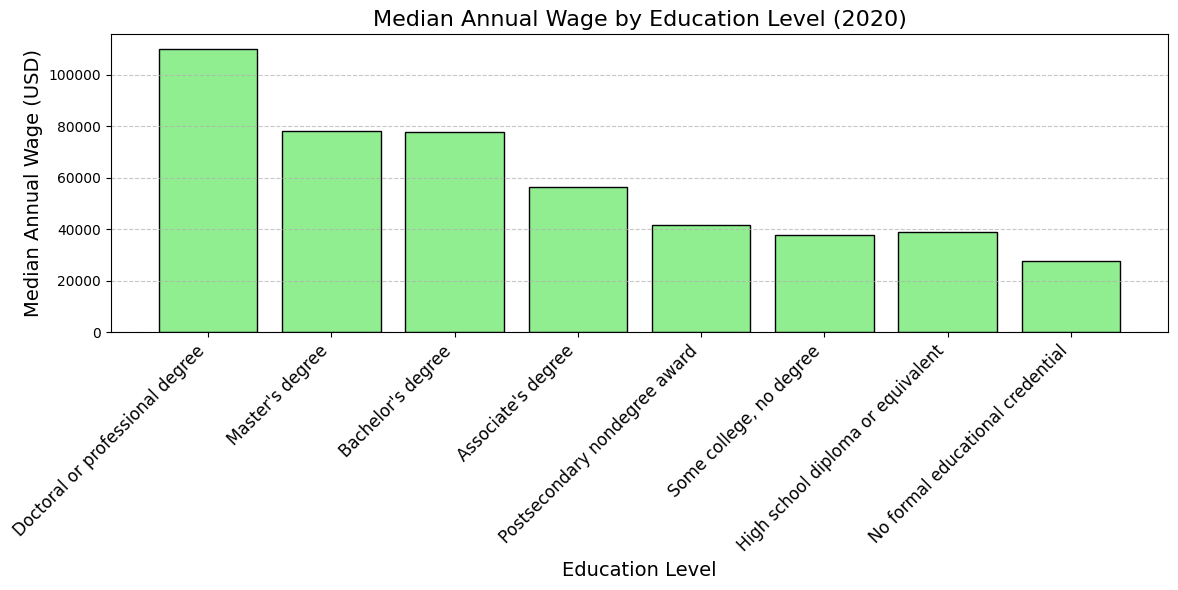

In [13]:
import matplotlib.pyplot as plt

# Function to process and extract relevant rows for Median Annual Wage
def extract_median_wage(sheet):
    data = []
    for row in sheet.iter_rows(min_row=1, max_row=sheet.max_row, min_col=1, max_col=sheet.max_column):
        row_values = [cell.value for cell in row]
        # Skip metadata rows, these rows don't really contribute to data.
        if (
            not row_values[0] or  # Skip rows with no label
            row_values[0].startswith("Table") or  # Skip title row
            row_values[0] == "Typical entry-level education" or  # Skip header row
            row_values[0] in ("Footnotes:", "(1)") or  # Skip footnote rows
            row_values[0].startswith("Note:") or  # Skip notes
            row_values[0].startswith("Source:")  # Skip source
        ):
            continue
        # Ensure all data rows have meaningful values
        if row_values[4] is not None:  # Check if Median Annual Wage is valid
            data.append(row_values)
    return data

# Extract relevant data (Median Annual Wage)
processed_data_wage = extract_median_wage(table1)

# Remove "Total, all occupations", throws off our data.
filtered_data_wage = [row for row in processed_data_wage if row[0] != "Total, all occupations"]

# Extract labels and Median Annual Wage values
labels_wage = [row[0] for row in filtered_data_wage]  # Column 0 (education levels)
median_annual_wage = [row[4] for row in filtered_data_wage]  # Column 4 (Median Annual Wage)

# Print extracted data
print("Labels:", labels_wage)
print("Median Annual Wage:", median_annual_wage)

# Plot the graph
plt.figure(figsize=(12, 6))
plt.bar(labels_wage, median_annual_wage, color='lightgreen', edgecolor='black')

# Adding title and labels
plt.title('Median Annual Wage by Education Level (2020)', fontsize=16)
plt.xlabel('Education Level', fontsize=14)
plt.ylabel('Median Annual Wage (USD)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:
# This data table is Table 5.3 Educational attainment for workers 25 years and older by detailed occupation, 2019
# List indices are: 2019 National Employment Matrix title, 2019 National Employment Matrix code,
#high school diploma num, some college no degree num, associates degree num, bachelors degree num, masters degree num, doctorate num
processTable(table2)
print("\n")

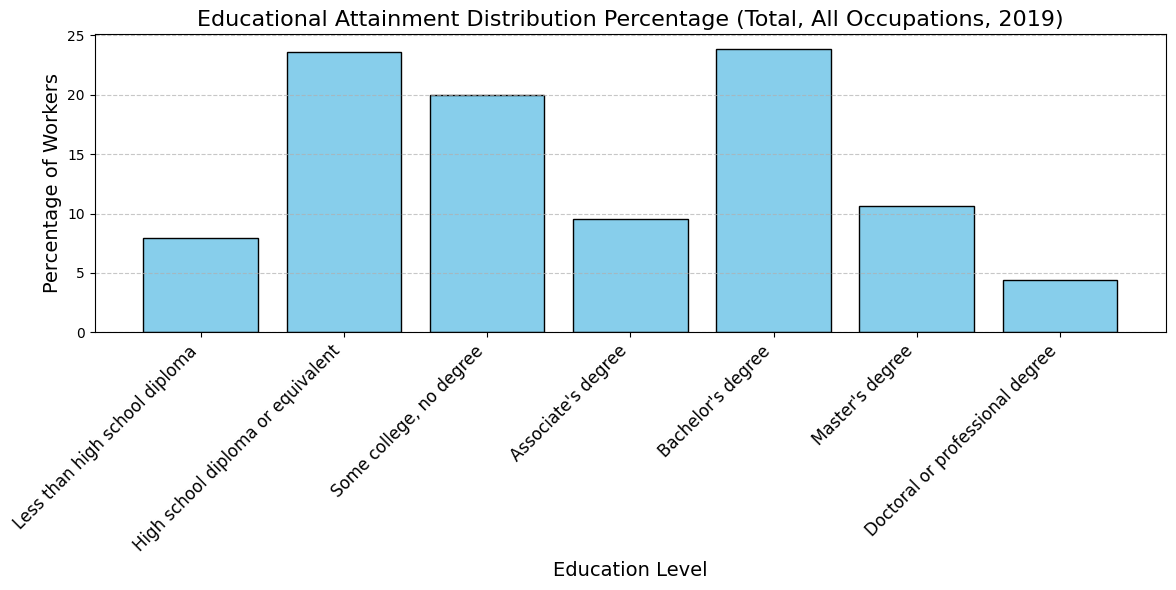

In [14]:

# Function to process and extract relevant rows for a specific title
def extract_total_occupation_data(sheet):
    for row in sheet.iter_rows(min_row=1, max_row=sheet.max_row, min_col=1, max_col=sheet.max_column):
        row_values = [cell.value for cell in row]
        # Look for the row with "Total, all occupations"
        if row_values[0] == "Total, all occupations":
            return row_values[2:]  # Return data starting from index 2 (excluding matrix code)

# Extracting data
total_occupation_data = extract_total_occupation_data(table2)

# Education levels corresponding to the data
education_levels = [
    "Less than high school diploma",
    "High school diploma or equivalent",
    "Some college, no degree",
    "Associate's degree",
    "Bachelor's degree",
    "Master's degree",
    "Doctoral or professional degree",
]

# Plot the bar graph
plt.figure(figsize=(12, 6))
plt.bar(education_levels, total_occupation_data, color='skyblue', edgecolor='black')
plt.title("Educational Attainment Distribution Percentage (Total, All Occupations, 2019)", fontsize=16)
plt.xlabel("Education Level", fontsize=14)
plt.ylabel("Percentage of Workers", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [15]:
# This data table is Table 5.4 Education and training assignments by detailed occupation, 2019
processTable(table3)
print("\n")


['Table 5.4 Education and training assignments by detailed occupation, 2019', None, None, None, None]
['2019 National Employment Matrix title', '2019 National Employment Matrix code', 'Typical education needed for entry', 'Work experience in a related occupation', 'Typical on-the-job training needed to attain competency in the occupation']
['Chief executives', '11-1011', "Bachelor's degree", '5 years or more', 'None']
['General and operations managers', '11-1021', "Bachelor's degree", '5 years or more', 'None']
['Legislators', '11-1031', "Bachelor's degree", 'Less than 5 years', 'None']
['Advertising and promotions managers', '11-2011', "Bachelor's degree", 'Less than 5 years', 'None']
['Marketing managers', '11-2021', "Bachelor's degree", '5 years or more', 'None']
['Sales managers', '11-2022', "Bachelor's degree", 'Less than 5 years', 'None']
['Public relations and fundraising managers', '11-2030', "Bachelor's degree", '5 years or more', 'None']
['Administrative services and faciliti

Beginning of visualizations for table 5.4 data:


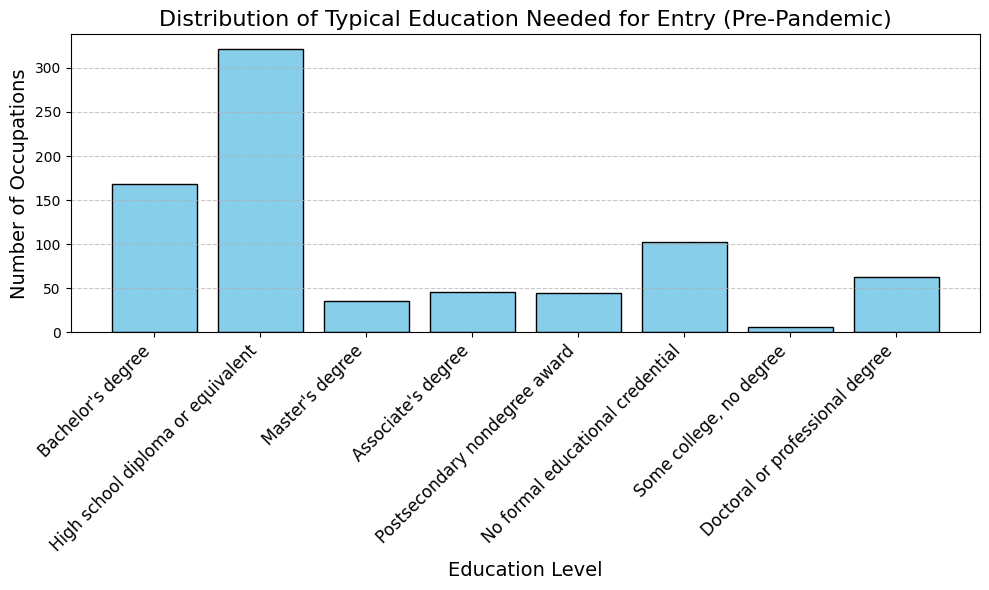

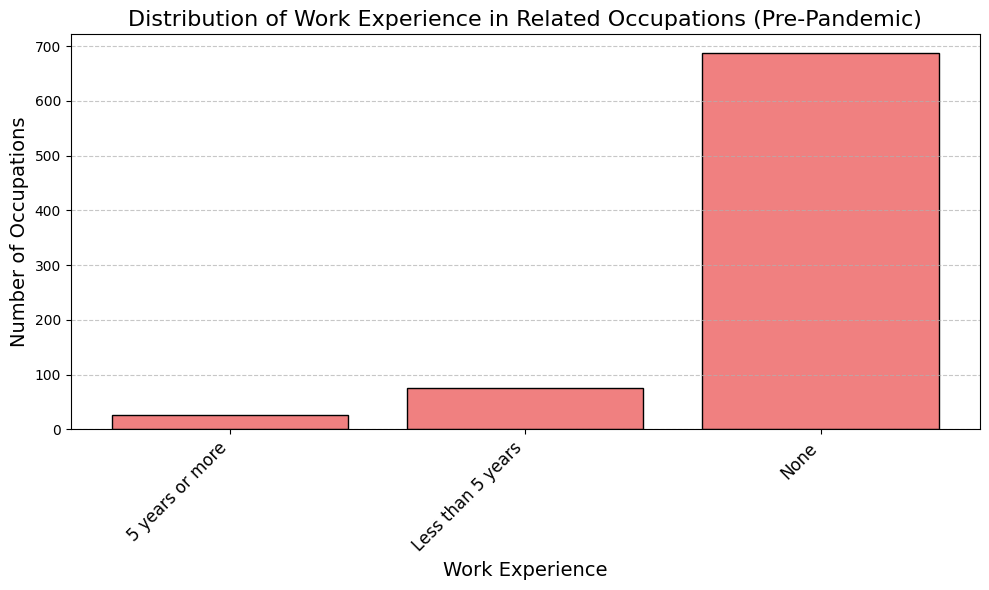

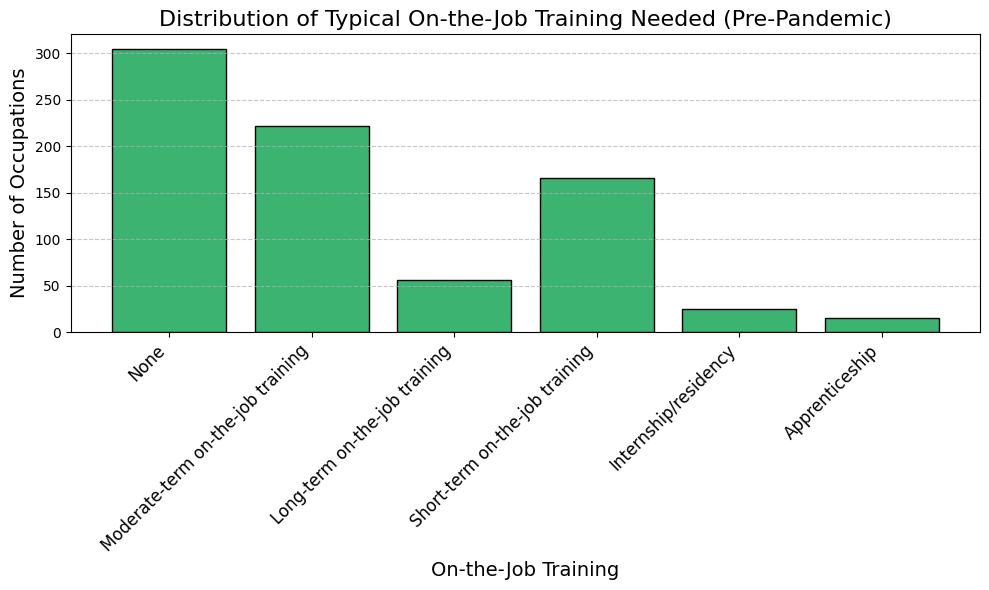

In [28]:
import matplotlib.pyplot as plt
from collections import Counter

# Access Table 5.4 (Education and training data)
table_prepandemic = workbook["Table 5.4"]
table_postpandemic = workbook2["Table 5.4"]

# Function to process and extract data from Table 5.4
def extract_table_5_4_data(sheet):
    data = []
    for row in sheet.iter_rows(min_row=4, max_row=sheet.max_row, min_col=1, max_col=6):  # Adjust rows/columns as needed
        row_values = [cell.value for cell in row]
        # Skip empty or metadata rows
        if not row_values[0] or row_values[0].startswith("Table") or row_values[0] in ("Footnotes:", "(1)"):
            continue
        # Collect only meaningful rows
        data.append({
            "Occupation": row_values[0],
            "Education": row_values[2],  # Column C
            "Work Experience": row_values[3],  # Column D
            "On-the-Job Training": row_values[4],  # Column E
        })
    return pd.DataFrame(data)

# Extract data for pre- and post-pandemic
data_prepandemic = extract_table_5_4_data(table_prepandemic)
data_postpandemic = extract_table_5_4_data(table_postpandemic)

Graph 1: Distribution of Typical Education Needed for Entry (Pre-Pandemic)

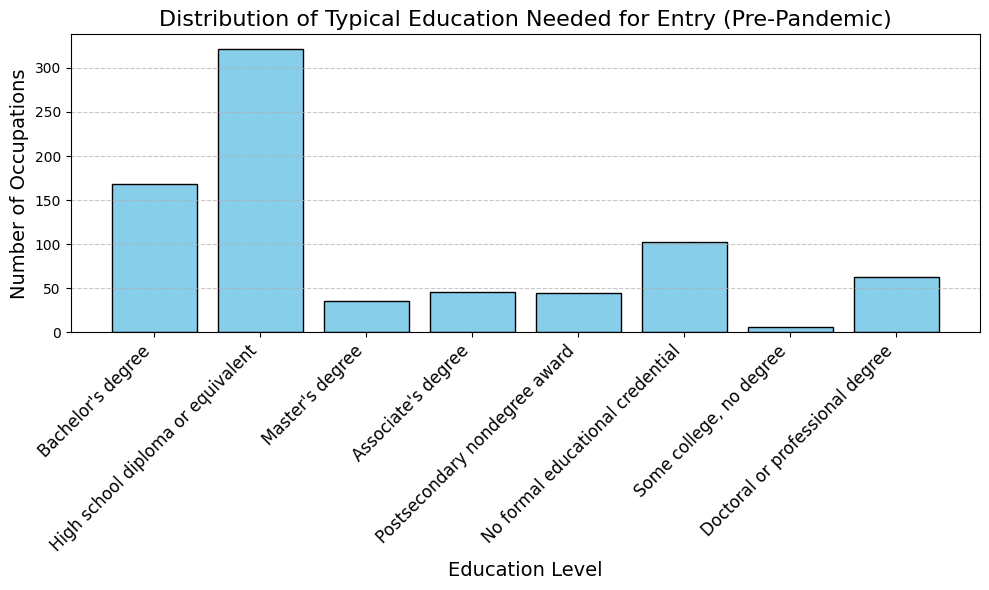

In [31]:
# Graph 1: Typical Education Needed for Entry
education_counts = Counter(data_prepandemic['Education'])

# Filter out None values from the keys
valid_education_keys = [key for key in education_counts.keys() if key is not None]
valid_education_values = [education_counts[key] for key in valid_education_keys]

plt.figure(figsize=(10, 6))
# Use the filtered keys and values for plotting
plt.bar(valid_education_keys, valid_education_values, color='skyblue', edgecolor='black')
plt.title('Distribution of Typical Education Needed for Entry (Pre-Pandemic)', fontsize=16)
plt.xlabel('Education Level', fontsize=14)
plt.ylabel('Number of Occupations', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Graph 2: Required Work Experience in a Related Occupation

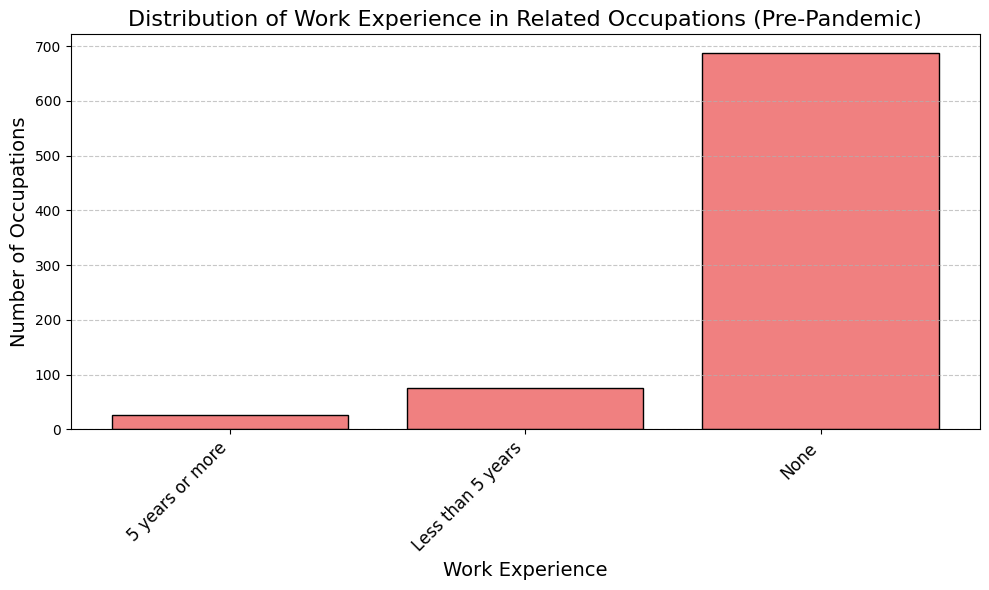

In [30]:
# Graph 2: Work Experience in a Related Occupation
experience_counts = Counter(data_prepandemic['Work Experience'])

# Filter out None values from the keys
valid_experience_keys = [key for key in experience_counts.keys() if key is not None]
valid_experience_values = [experience_counts[key] for key in valid_experience_keys]


plt.figure(figsize=(10, 6))
# Use the filtered keys and values for plotting
plt.bar(valid_experience_keys, valid_experience_values, color='lightcoral', edgecolor='black')
plt.title('Distribution of Work Experience in Related Occupations (Pre-Pandemic)', fontsize=16)
plt.xlabel('Work Experience', fontsize=14)
plt.ylabel('Number of Occupations', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Graph 3: Typical On-the-Job Training Needed

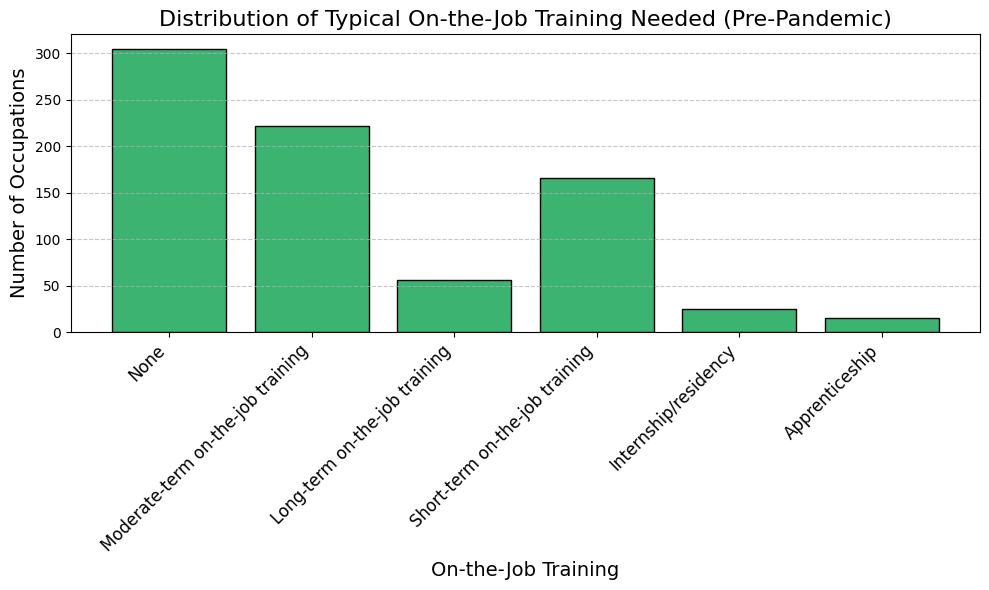

In [29]:
# Graph 3: Typical On-the-Job Training Needed
training_counts = Counter(data_prepandemic['On-the-Job Training'])

# Filter out None values from the keys
valid_training_keys = [key for key in training_counts.keys() if key is not None]
valid_training_values = [training_counts[key] for key in valid_training_keys]

# Plot the data for Typical On-the-Job Training
plt.figure(figsize=(10, 6))
plt.bar(valid_training_keys, valid_training_values, color='mediumseagreen', edgecolor='black')
plt.title('Distribution of Typical On-the-Job Training Needed (Pre-Pandemic)', fontsize=16)
plt.xlabel('On-the-Job Training', fontsize=14)
plt.ylabel('Number of Occupations', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


The cell below displays 7 charts - one for each education level from graph 1 combined with the data from graph 2 (the amount of work experince needed for an occupation)

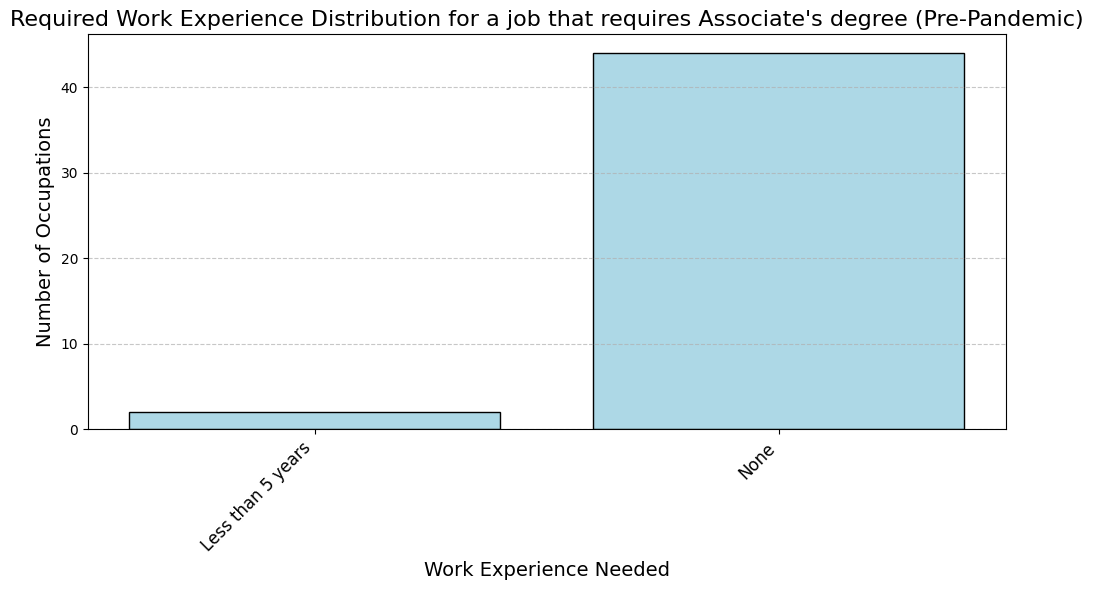

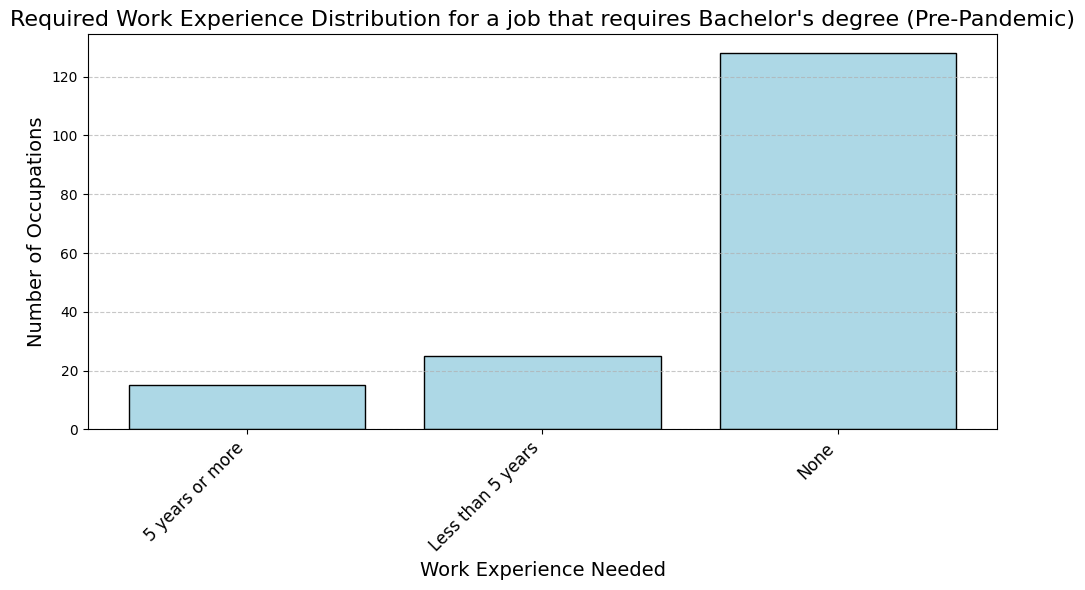

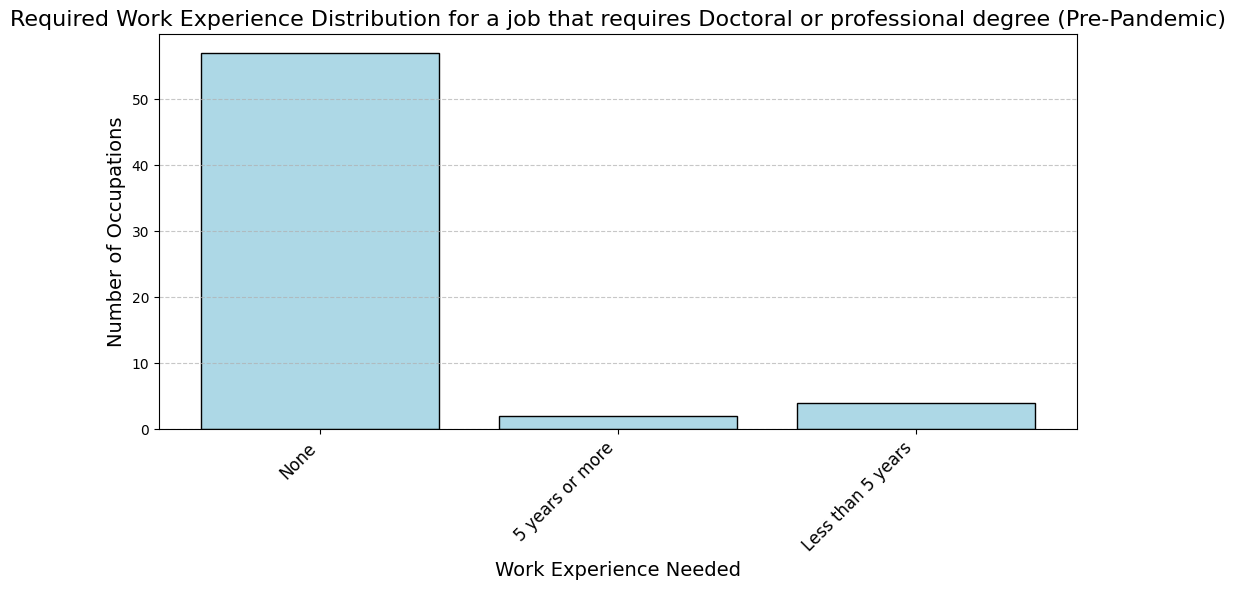

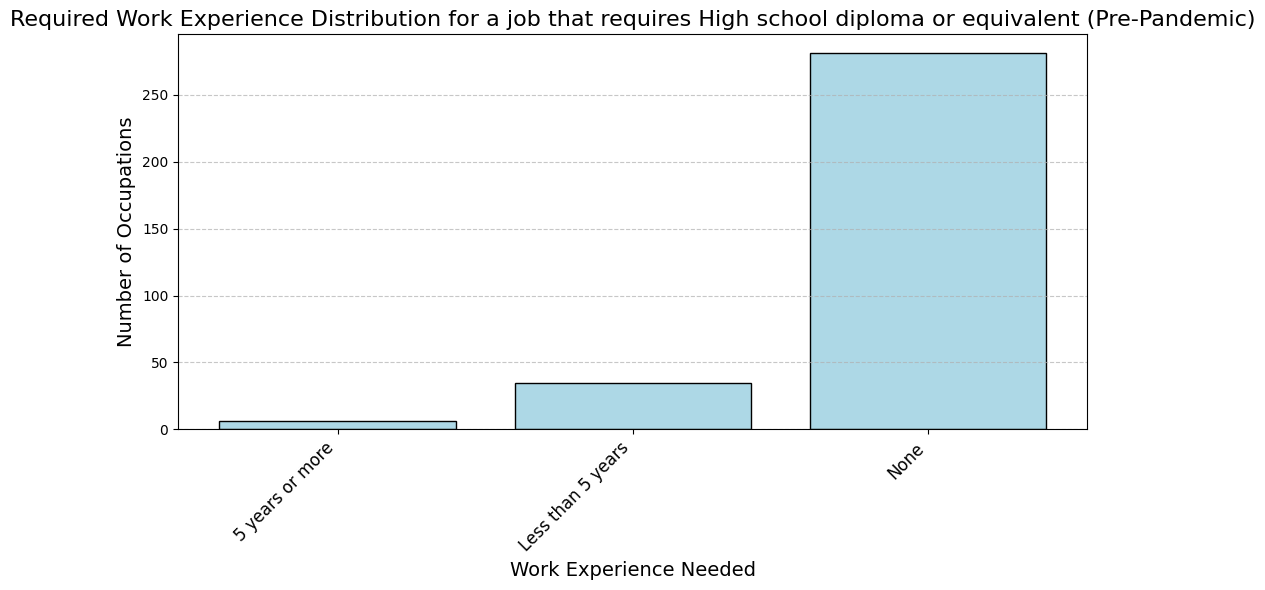

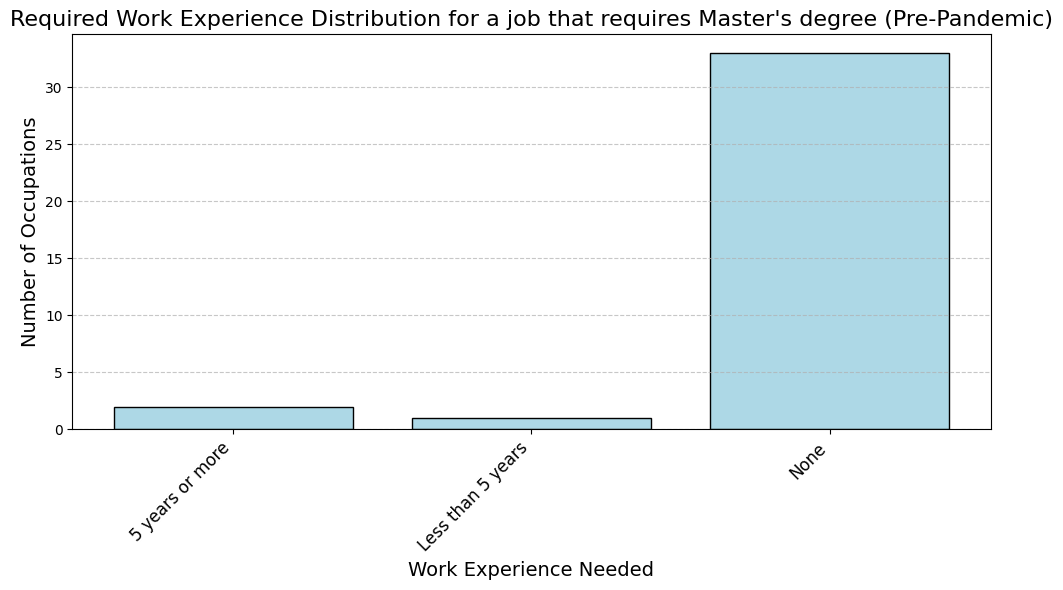

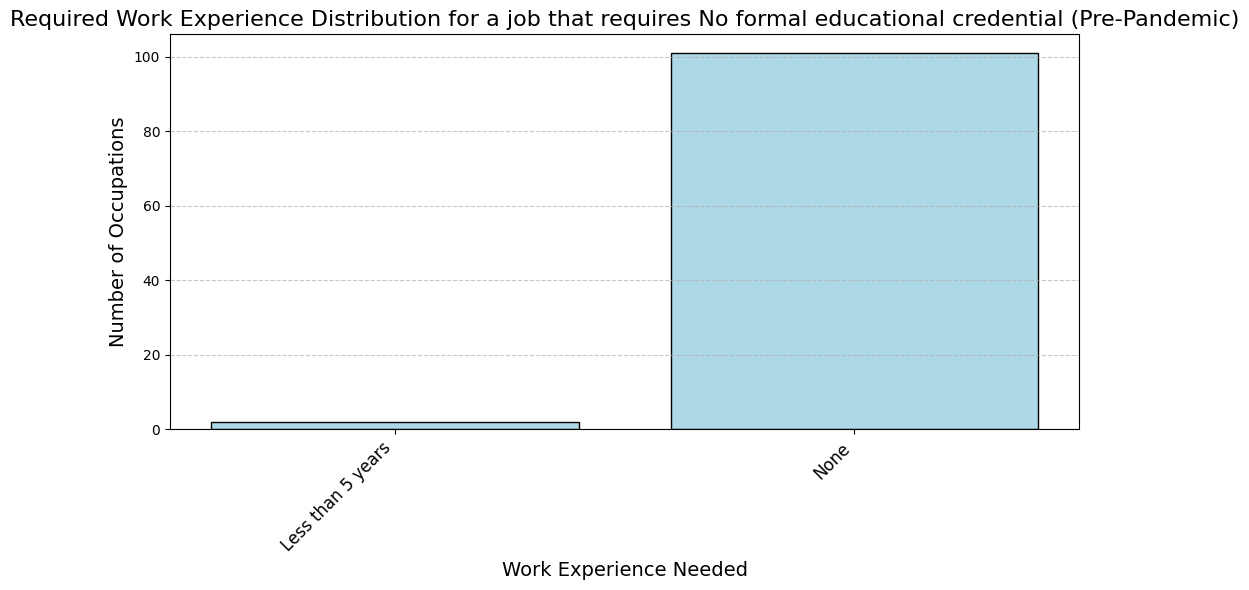

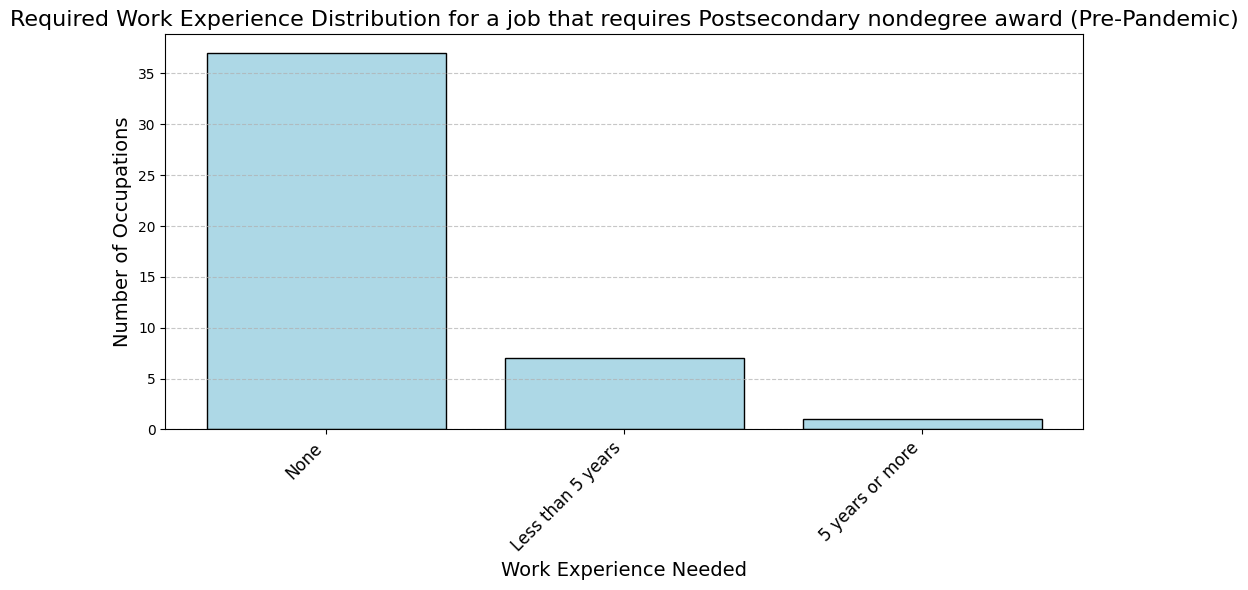

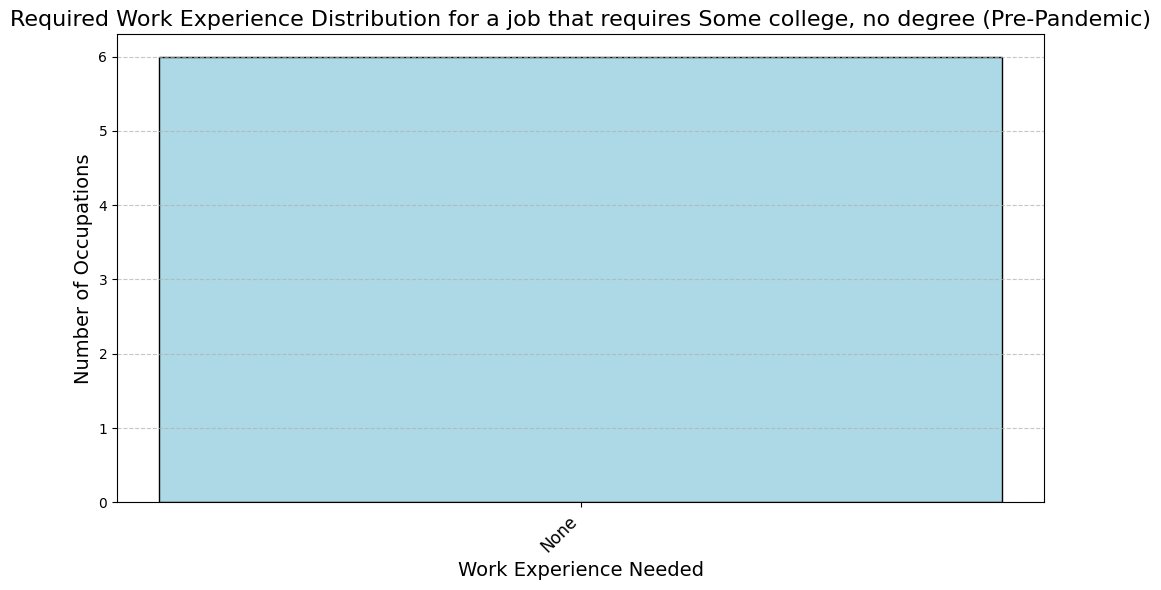

In [38]:
# Graphs for Data from both graphs 1 and 2

# Group data by education level
grouped_by_education = data_prepandemic.groupby('Education')

# Iterate over each education level and plot the distribution of work experience
for education_level, group in grouped_by_education:
    print("\n")
    # Count work experience categories for this education level
    work_experience_counts = Counter(group['Work Experience'])

    # Filter out None values
    valid_experience_keys = [key for key in work_experience_counts.keys() if key is not None]
    valid_experience_values = [work_experience_counts[key] for key in valid_experience_keys]

    # Plot the data
    plt.figure(figsize=(10, 6))
    plt.bar(valid_experience_keys, valid_experience_values, color='lightblue', edgecolor='black')
    plt.title(f'Required Work Experience Distribution for a job that requires {education_level} (Pre-Pandemic)', fontsize=16)
    plt.xlabel('Work Experience Needed', fontsize=14)
    plt.ylabel('Number of Occupations', fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


In [16]:
# -- POST PANDEMIC DATA --

# This data table is Table 5.2 Employment, wages, and projected change in employment by typical entry-level education (Employment in thousands)
# List indices are: Typical Entry level education, employment 2033, employment distribution % 2023, employment change % 2023-33, median annual wage
processTable(table1p)
print("\n")

['Table 5.2 Employment, wages, and projected change in employment by typical entry-level education \n(Employment in thousands)', None, None, None, None]
['Typical entry-level education', 'Employment, 2019', 'Employment distribution, percent, 2019', 'Employment change, percent, 2019-29', 'Median annual wage, 2020(1)']
['Total, all occupations', 162795.6, 100, 3.7, 41950]
['Doctoral or professional degree', 4412.8, 2.7, 5.9, 110200]
["Master's degree", 2633.9, 1.6, 15, 78210]
["Bachelor's degree", 36864.2, 22.6, 6.4, 77920]
["Associate's degree", 3601.6, 2.2, 6.2, 56590]
['Postsecondary nondegree award', 10093.2, 6.2, 5.6, 41520]
['Some college, no degree', 4085, 2.5, -0.1, 37770]
['High school diploma or equivalent', 62410, 38.3, 1.5, 39070]
['No formal educational credential', 38694.8, 23.8, 3.3, 27510]
['Footnotes:', None, None, None, None]
['(1) Data are from the Occupational Employment Statistics program, U.S. Bureau of Labor Statistics.  Wage data cover non-farm wage and salary wor

In [ ]:
# This data table is Table 5.3 Educational attainment for workers 25 years and older by detailed occupation, 2023
# List indices are: 2019 National Employment Matrix title, 2019 National Employment Matrix code,
#high school diploma num, some college no degree num, associates degree num, bachelors degree num, masters degree num, doctorate num
processTable(table2p)
print("\n")

['Table 5.3 Educational attainment for workers 25 years and older by detailed occupation, 2019', None, None, None, None, None, None, None, None]
['2019 National Employment Matrix title', '2019 National Employment Matrix code', 'Less than high school diploma', 'High school diploma or equivalent', 'Some college, no degree', "Associate's degree", "Bachelor's degree", "Master's degree", 'Doctoral or professional degree']
['Total, all occupations', '00-0000', 7.9, 23.6, 20, 9.5, 23.9, 10.6, 4.4]
['Chief executives(1)', '11-1011', 1.6, 8, 13.9, 4.8, 41, 24.1, 6.5]
['General and operations managers', '11-1021', 2.6, 16.9, 24.3, 10, 33.4, 11.1, 1.7]
['Legislators(1)', '11-1031', 1.6, 8, 13.9, 4.8, 41, 24.1, 6.5]
['Advertising and promotions managers', '11-2011', 1.1, 1.8, 10.6, 6.2, 65.6, 12.7, 2]
['Marketing managers', '11-2021', 0.8, 4.1, 8.7, 5, 56.2, 23.6, 1.7]
['Sales managers', '11-2022', 1.3, 11, 19.5, 9, 46.3, 11.8, 1.1]
['Public relations and fundraising managers', '11-2030', 0.1, 3.3

In [ ]:
# This data table is Table 5.4 Education and training assignments by detailed occupation, 2023
processTable(table3p)
print("\n")

['Table 5.4 Education and training assignments by detailed occupation, 2019', None, None, None, None]
['2019 National Employment Matrix title', '2019 National Employment Matrix code', 'Typical education needed for entry', 'Work experience in a related occupation', 'Typical on-the-job training needed to attain competency in the occupation']
['Chief executives', '11-1011', "Bachelor's degree", '5 years or more', 'None']
['General and operations managers', '11-1021', "Bachelor's degree", '5 years or more', 'None']
['Legislators', '11-1031', "Bachelor's degree", 'Less than 5 years', 'None']
['Advertising and promotions managers', '11-2011', "Bachelor's degree", 'Less than 5 years', 'None']
['Marketing managers', '11-2021', "Bachelor's degree", '5 years or more', 'None']
['Sales managers', '11-2022', "Bachelor's degree", 'Less than 5 years', 'None']
['Public relations and fundraising managers', '11-2030', "Bachelor's degree", '5 years or more', 'None']
['Administrative services and faciliti